In [19]:
import torch
from torch import nn

from polyhedra import cx

import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [20]:
# set up the type of network we will compute the decision boundaries for. 2 layer neural network

class NeuralNetwork(nn.Module):
    def __init__(self, architecture):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        
        self.linear_0 = nn.Linear(architecture[0],architecture[1])
        self.relu_0 = nn.ReLU()
        self.linear_1 = nn.Linear(architecture[1],architecture[2])
        self.relu_1 = nn.ReLU()
        self.linear_2 = nn.Linear(architecture[2],architecture[3])


    def forward(self, x):
        x = self.flatten(x)
        
        self.activity_0 = self.linear_0(x) 
        self.activity_1 = self.linear_1(self.relu_0(self.activity_0))
        self.activity_2 = self.linear_2(self.relu_1(self.activity_1))

        return self.activity_0, self.activity_1, self.activity_2

In [ ]:
#select architecture for code
architecture = [2,10,5,1]

#randomly initialize neural network with this architecture
model = NeuralNetwork(architecture) 

plot_dictionary, vertices, ss_vertices = cx.get_full_complex(model, max_depth=3, verbose=True)


First Layer Complete
56 regions to evaluate ... 


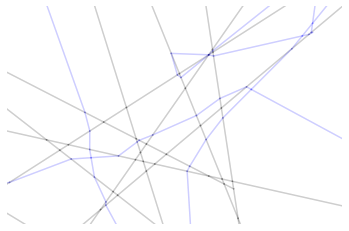

In [17]:
#plot 

fig,ax = plt.subplots()

bound = 2

ax.set_xlim(-bound, bound)
ax.set_ylim(-bound, bound)

ax.set_axis_off()

colors = ['black']*architecture[1]+['blue']*architecture[2] + ['red']

pd = cx.numpyize_plot_dict(plot_dictionary)

cx.plot_complex(pd, 
                sum(architecture[1:]), 
                dim=2,
                colors=colors, 
                ax = ax)

plt.show()